In [1]:
# Import Dependencies
import pandas as pd
import sklearn.preprocessing as skl
import matplotlib.pyplot as plt
from statsmodels import tsa
import numpy as np
import seaborn as sn
import datetime as dt

In [2]:
# Read in the csv 
sales_df = pd.read_csv("Resources/Walmart.csv")
sales_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_4209/1296622976.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sales_df.corr()


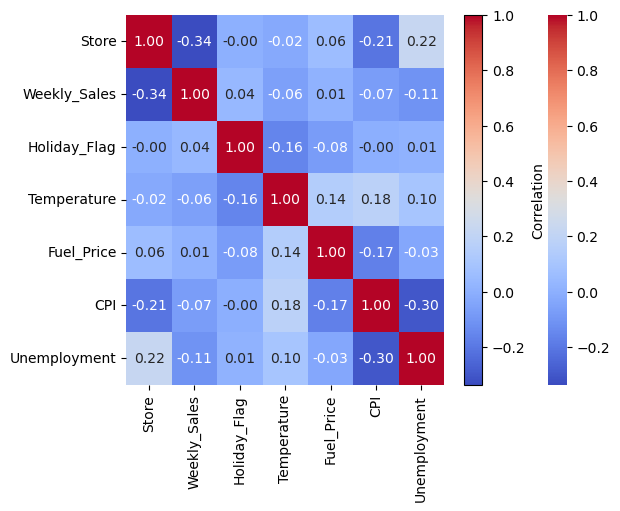

In [3]:
# Calculate the correlation matrix
correlation_matrix = sales_df.corr()

# Create a heatmap with annotations and capture the Axes object
ax = sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Optionally, you can set the color bar label 
plt.colorbar(ax.collections[0], label='Correlation')

# Show the plot
plt.show()

In [4]:
sales_df.groupby('Holiday_Flag').mean()['Weekly_Sales']

/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_4209/2122525807.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_df.groupby('Holiday_Flag').mean()['Weekly_Sales']


Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [5]:
sales_df[sales_df['Holiday_Flag']==1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,25-11-2011,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,30-12-2011,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,10-02-2012,803657.12,1,37.00,3.640,189.707605,8.424


In [6]:
# Will drop Holiday Flag since it has not clear indicator in sales increase of decrease

In [7]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'],format = '%d-%m-%Y')

In [8]:
sales_group = sales_df.groupby('Date')
agg_sales_df = pd.DataFrame(sales_group.sum()['Weekly_Sales'])
agg_sales_df['Fuel_Price'] = sales_group.mean()['Fuel_Price']
agg_sales_df['CPI'] = sales_group.mean()['CPI']
agg_sales_df['Temperature'] = sales_group.mean()['Temperature']
agg_sales_df

,Weekly_Sales,Fuel_Price,CPI,Temperature
Date,,,,
2010-02-05,49750740.50,2.717844,167.730885,34.037333
2010-02-12,48336677.63,2.694022,167.825608,34.151333
2010-02-19,48276993.78,2.672067,167.871686,37.719778
2010-02-26,43968571.13,2.683933,167.909657,39.243556
2010-03-05,46871470.30,2.731200,167.947628,42.917333
...,...,...,...,...
2012-09-28,43734899.40,3.854578,176.373588,68.754444
2012-10-05,47566639.31,3.845222,176.505052,65.973111
2012-10-12,46128514.25,3.896733,176.636515,58.342667


In [9]:
sales_df.groupby('Store').count()['Weekly_Sales']

Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: Weekly_Sales, dtype: int64

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09')])

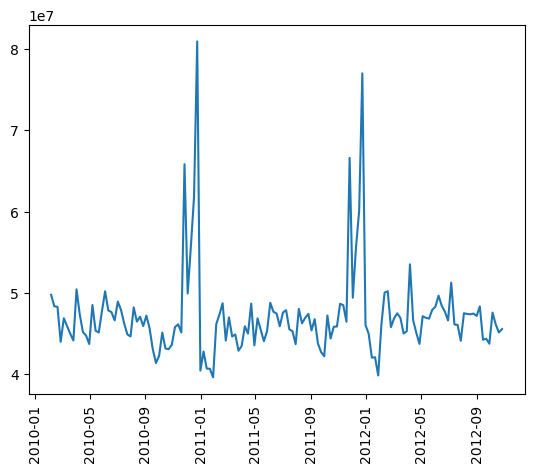

In [10]:
plt.plot(agg_sales_df.index,agg_sales_df['Weekly_Sales'])
plt.xticks(rotation = 90)

In [11]:
agg_sales_df_2010 = agg_sales_df.loc[:dt.date(2010,12,31)]
agg_sales_df_2010

,Weekly_Sales,Fuel_Price,CPI,Temperature
Date,,,,
2010-02-05,49750740.50,2.717844,167.730885,34.037333
2010-02-12,48336677.63,2.694022,167.825608,34.151333
2010-02-19,48276993.78,2.672067,167.871686,37.719778
2010-02-26,43968571.13,2.683933,167.909657,39.243556
2010-03-05,46871470.30,2.731200,167.947628,42.917333
2010-03-12,45925396.51,2.774422,167.985598,47.432444
2010-03-19,44988974.64,2.817089,167.930427,49.954222
2010-03-26,44133961.05,2.824111,167.859731,48.473556
2010-04-02,50423831.26,2.827333,167.789036,53.120889


In [12]:
agg_sales_df_2011 = agg_sales_df.loc[dt.date(2011,1,7):dt.date(2011,12,30)]
agg_sales_df_2011

,Weekly_Sales,Fuel_Price,CPI,Temperature
Date,,,,
2011-01-07,42775787.77,3.089244,168.575662,35.272667
2011-01-14,40673678.04,3.105000,168.651733,30.689556
2011-01-21,40654648.03,3.126889,168.863870,37.522222
2011-01-28,39599852.99,3.134689,169.076008,34.064444
2011-02-04,46153111.12,3.134822,169.288145,30.480889
2011-02-11,47336192.79,3.162400,169.500283,32.159111
2011-02-18,48716164.12,3.182578,169.693224,45.883778
2011-02-25,44125859.84,3.212200,169.878487,43.155333
2011-03-04,46980603.74,3.395400,170.063750,44.775333


In [13]:
agg_sales_df_2012 = agg_sales_df.loc[dt.date(2012,1,6):]
agg_sales_df_2012

,Weekly_Sales,Fuel_Price,CPI,Temperature
Date,,,,
2012-01-06,44955421.95,3.299400,174.116233,41.133333
2012-01-13,42023078.48,3.370644,174.240534,39.690222
2012-01-20,42080996.56,3.391800,174.318130,39.741778
2012-01-27,39834974.67,3.411556,174.395727,42.726000
2012-02-03,46085608.09,3.451689,174.473324,44.804444
2012-02-10,50009407.92,3.500800,174.550920,39.848000
2012-02-17,50197056.96,3.562511,174.659056,40.203333
2012-02-24,45771506.57,3.620489,174.790097,45.124000
2012-03-02,46861034.97,3.696022,174.921137,45.486444


In [14]:
agg_sales_df_2010['Week_NO']=list(range(5,53))
agg_sales_df_2011['Week_NO']=list(range(1,53))
agg_sales_df_2012['Week_NO']=list(range(1,44))
print(agg_sales_df_2010['Week_NO'])
print(agg_sales_df_2011["Week_NO"])
agg_sales_df_2012['Week_NO']

Date
2010-02-05     5
2010-02-12     6
2010-02-19     7
2010-02-26     8
2010-03-05     9
2010-03-12    10
2010-03-19    11
2010-03-26    12
2010-04-02    13
2010-04-09    14
2010-04-16    15
2010-04-23    16
2010-04-30    17
2010-05-07    18
2010-05-14    19
2010-05-21    20
2010-05-28    21
2010-06-04    22
2010-06-11    23
2010-06-18    24
2010-06-25    25
2010-07-02    26
2010-07-09    27
2010-07-16    28
2010-07-23    29
2010-07-30    30
2010-08-06    31
2010-08-13    32
2010-08-20    33
2010-08-27    34
2010-09-03    35
2010-09-10    36
2010-09-17    37
2010-09-24    38
2010-10-01    39
2010-10-08    40
2010-10-15    41
2010-10-22    42
2010-10-29    43
2010-11-05    44
2010-11-12    45
2010-11-19    46
2010-11-26    47
2010-12-03    48
2010-12-10    49
2010-12-17    50
2010-12-24    51
2010-12-31    52
Name: Week_NO, dtype: int64
Date
2011-01-07     1
2011-01-14     2
2011-01-21     3
2011-01-28     4
2011-02-04     5
2011-02-11     6
2011-02-18     7
2011-02-25     8
2011-03-04

/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_4209/1663040866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_sales_df_2010['Week_NO']=list(range(5,53))
/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_4209/1663040866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_sales_df_2011['Week_NO']=list(range(1,53))
/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_4209/1663040866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

Date
2012-01-06     1
2012-01-13     2
2012-01-20     3
2012-01-27     4
2012-02-03     5
2012-02-10     6
2012-02-17     7
2012-02-24     8
2012-03-02     9
2012-03-09    10
2012-03-16    11
2012-03-23    12
2012-03-30    13
2012-04-06    14
2012-04-13    15
2012-04-20    16
2012-04-27    17
2012-05-04    18
2012-05-11    19
2012-05-18    20
2012-05-25    21
2012-06-01    22
2012-06-08    23
2012-06-15    24
2012-06-22    25
2012-06-29    26
2012-07-06    27
2012-07-13    28
2012-07-20    29
2012-07-27    30
2012-08-03    31
2012-08-10    32
2012-08-17    33
2012-08-24    34
2012-08-31    35
2012-09-07    36
2012-09-14    37
2012-09-21    38
2012-09-28    39
2012-10-05    40
2012-10-12    41
2012-10-19    42
2012-10-26    43
Name: Week_NO, dtype: int64

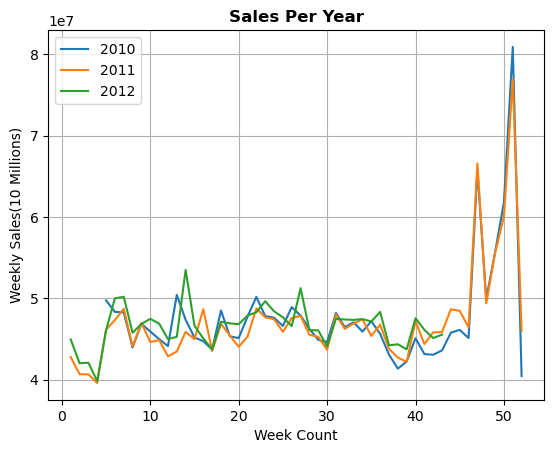

In [15]:
fig,ax = plt.subplots(1,1)
plt.plot(agg_sales_df_2010['Week_NO'],agg_sales_df_2010['Weekly_Sales'],label=2010)
plt.plot(agg_sales_df_2011['Week_NO'],agg_sales_df_2011['Weekly_Sales'],label=2011)
plt.plot(agg_sales_df_2012['Week_NO'],agg_sales_df_2012['Weekly_Sales'],label=2012)
plt.xlabel('Week Count')
plt.ylabel('Weekly Sales(10 Millions)')
ax.legend()
plt.title('Sales Per Year',fontweight='bold')
plt.grid()

(array([14730., 14853., 14975., 15095., 15218., 15340., 15461., 15584.]),
 [Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09')])

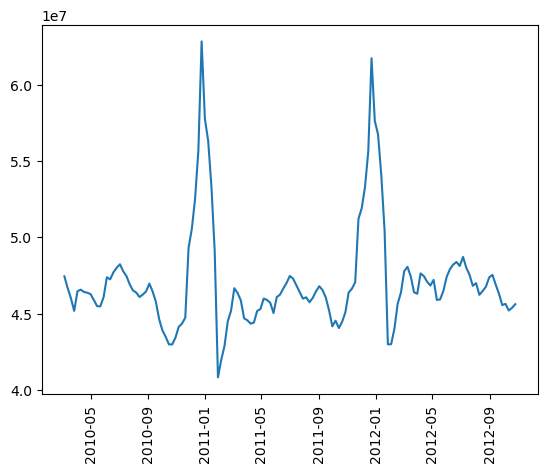

In [16]:
ma_sales_df = agg_sales_df['Weekly_Sales'].rolling(5).mean().iloc[4:]
ma_sales_df
plt.plot(ma_sales_df)
plt.xticks(rotation = 90)


(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09')])

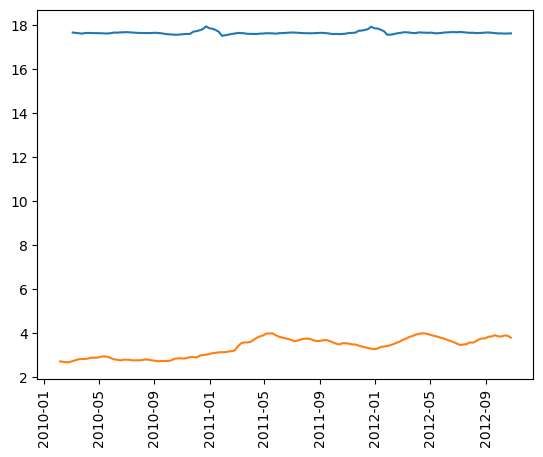

In [17]:
scaled_sales = np.log(np.array(ma_sales_df))
plt.plot(ma_sales_df.index,scaled_sales)

plt.plot(agg_sales_df.index,agg_sales_df['Fuel_Price'])

plt.xticks(rotation = 90)

# Preprocessing

In [18]:
# Use Preprocessing methods
from sklearn.preprocessing import StandardScaler
y = StandardScaler().fit_transform(np.array(agg_sales_df['Weekly_Sales']).reshape(-1,1))


In [19]:
# Get our target and features arrays
X = np.array(range(agg_sales_df.shape[0])).reshape(-1,1)


In [20]:
# Split into testing and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
lr.fit(X,y)
intercept = lr.intercept_
coef = lr.coef_


/Users/mikedibo/opt/anaconda3/envs/pythondata1/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


array([[0.00078802]])

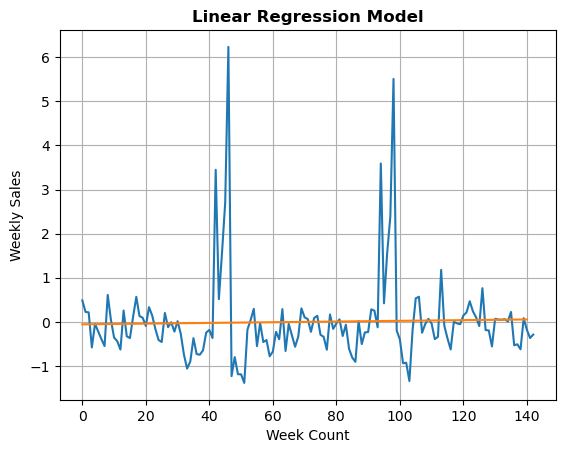

In [50]:
plt.plot(X,y)
plt.plot([0,140],[intercept,intercept+coef*140])
plt.title('Linear Regression Model',fontweight='bold')
plt.xlabel('Week Count')
plt.ylabel('Weekly Sales')
plt.grid()
coef

In [24]:
#Calculate Mean Squared Error
pred = [x*coef+intercept for x in X]
squares = []
for x in X:
    squares.append((pred[x[0]][0]-y[x[0]])**2)
    print(x)
np.mean(squares)


[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]


0.9989418473387157

In [25]:
sortedx= zip(X_test,y_test)
i=0
counter = 0
sortedx = list(sortedx)
while counter<len(sortedx):
    if sortedx[i][0] > sortedx[i+1][0]:
        sortedx[i],sortedx[i+1]=sortedx[i+1],sortedx[1]
        counter = 0
    else : 
        counter += 1
print(sortedx)
lr = LinearRegression()
lr.fit(X,y)
intercept = lr.intercept_
coef = lr.coef_
print(list(X_test))

[(array([19]), array([0.09375371])), (array([19]), array([0.09375371])), (array([82]), array([-0.32013868])), (array([97]), array([2.39114259])), (array([56]), array([-0.02448155])), (array([12]), array([-0.62824085])), (array([131]), array([0.05346069])), (array([65]), array([-0.04635112])), (array([66]), array([-0.30732397])), (array([18]), array([0.1314487])), (array([51]), array([-1.38495421])), (array([78]), array([0.16627183])), (array([94]), array([3.5907269])), (array([132]), array([0.04442884])), (array([100]), array([-0.39777751])), (array([64]), array([-0.66051542])), (array([27]), array([-0.11962851])), (array([69]), array([0.30572033])), (array([125]), array([-0.09516946])), (array([73]), array([0.08573055])), (array([11]), array([-0.43850817])), (array([119]), array([-0.05335907])), (array([110]), array([-0.0390616])), (array([113]), array([1.17764699])), (array([55]), array([-0.55068832])), (array([45]), array([2.71096933])), (array([9]), array([0.04642665])), (array([4]

/Users/mikedibo/opt/anaconda3/envs/pythondata1/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


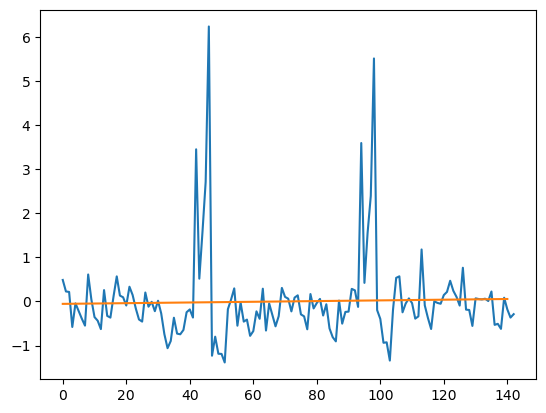

In [26]:
plt.plot(X,y)
plt.plot([0,140],[intercept,intercept+coef*140])

In [27]:
#Calculate Mean Squared Error
pred = [x*coef+intercept for x in X]
squares = []
for x in X:
    squares.append((pred[x[0]][0]-y[x[0]])**2)
    print(x)
np.mean(squares)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]


0.9989418473387157

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [61]:
a = list(range(2, 6))
train_scores = []
test_scores = []

for i in range(0, 4):
    rf = RandomForestRegressor(max_depth=a[i], random_state=4, n_estimators=80)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_scores.append(train_r2)
    
    test_pred = rf.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_scores.append(test_r2)
X_train.shape
print("Train R2 Scores:", train_scores)
print("Test R2 Scores:", test_scores)


/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_4209/1116366072.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_4209/1116366072.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_4209/1116366072.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_4209/1116366072.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), fo

(107, 1)

# First XGBOOST Model

In [30]:
# Create the first XGBoost Model

In [31]:
# Calculate Accuracy

# Optimizing the Model

In [32]:
# Optimize the model by dropping colums from the dataframe, etc and calculate accuracy again

# Optimize model one more time (If haven't reached 75% accuracy)

In [33]:
# If accuracy is still not at 75% or higher, optimize the model one more time and calculate accuracy